In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [27]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


9


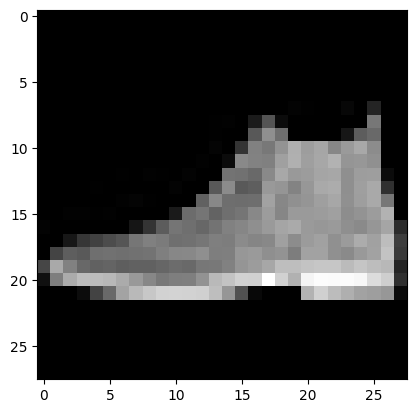

In [4]:
'''
테스트할 샘플 하나를 살펴보자.
'''
plt.imshow(x_test[0], cmap='gray')
print(y_test[0]) # 답

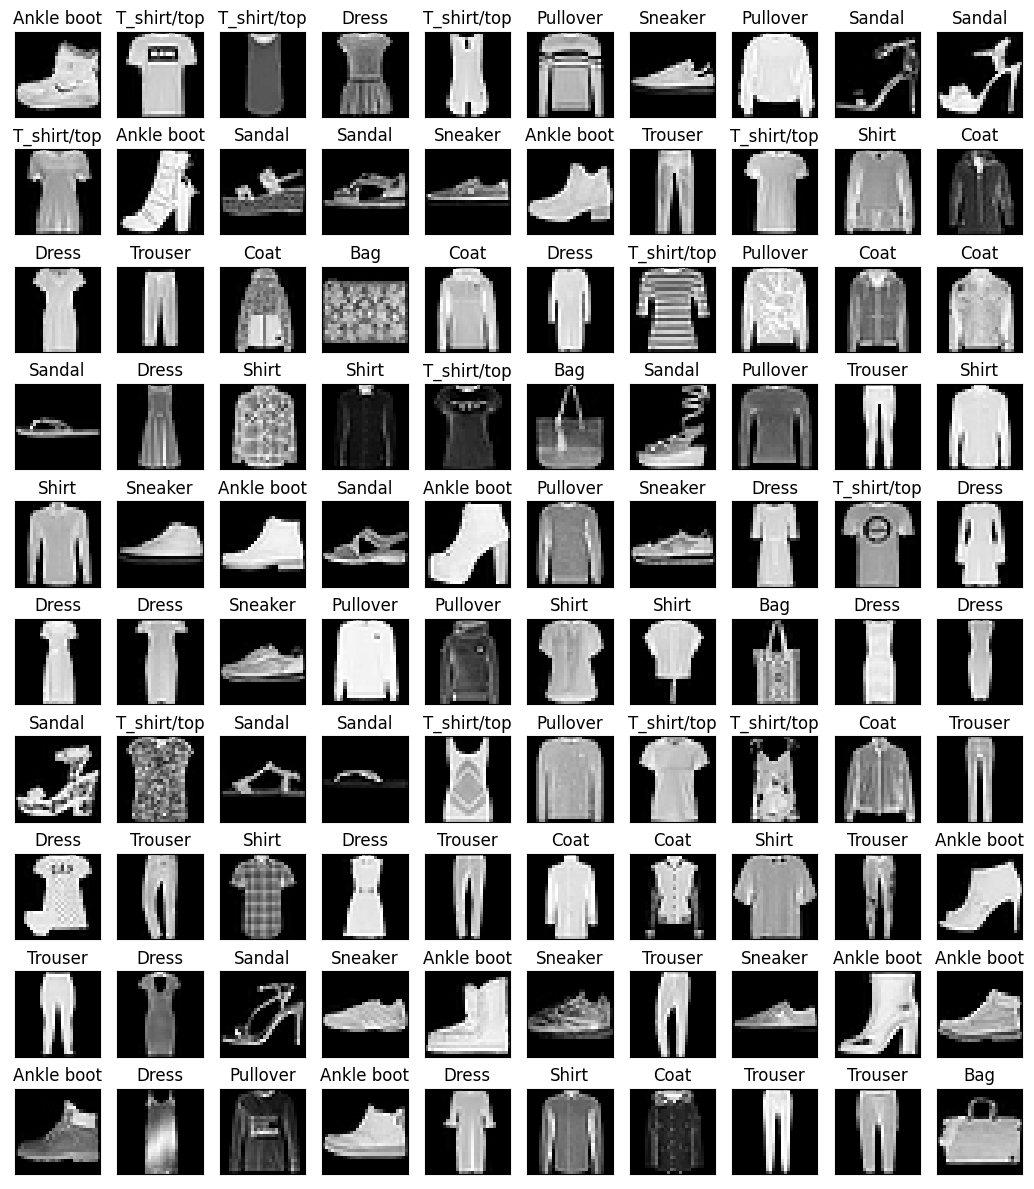

In [5]:
'''
패션 아이템 이미지와 라벨의 숫자가 의미하는 아이템 이름과 함께 시각화
'''
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(13, 15), subplot_kw={'xticks': [], 'yticks': []})

labels = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    title = labels[y_train[i]]
    ax.set_title(title)

plt.show()

In [28]:
'''
전처리
- 3차원(샘플수, 행, 열) -> 4차원(샘플수, 가로, 세로, 채널)
- 정수를 실수로 변경
- 0 ~ 255 사이의 수치를 0.0 ~ 1.0 사이로 정규화 수행
라벨 전처리
- 0 ~ 9 라벨에 대한 원핫인코딩 수행
'''
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
'''
네트워크 아키텍처 구성
- input: 1차원의 784개 벡터
- output: 10개 벡터
- activation 함수: softmax
- loss 함수: categorical_crossentropy
- optimizer: adam
- 평가 matrics: accuracy
 
컨볼루션 신경망을 구성하기 위해 컨볼루션 레이어, 맥스 풀링 레이어, 플래튼 레이어를 사용했다.
'''
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
'''
모델 학습
'''
checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

hist = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=[checkpoint_callback])

Epoch 1/100
1500/1500 [==============================] - 134s 89ms/step - loss: 0.3807 - accuracy: 0.8615 - val_loss: 0.2822 - val_accuracy: 0.8973
Epoch 2/100
1500/1500 [==============================] - 190s 127ms/step - loss: 0.2366 - accuracy: 0.9135 - val_loss: 0.2345 - val_accuracy: 0.9144
Epoch 3/100
1500/1500 [==============================] - 178s 118ms/step - loss: 0.1906 - accuracy: 0.9296 - val_loss: 0.2164 - val_accuracy: 0.9222
Epoch 4/100
1500/1500 [==============================] - 184s 122ms/step - loss: 0.1524 - accuracy: 0.9429 - val_loss: 0.2115 - val_accuracy: 0.9237
Epoch 5/100
1500/1500 [==============================] - 174s 116ms/step - loss: 0.1203 - accuracy: 0.9550 - val_loss: 0.2080 - val_accuracy: 0.9299
Epoch 6/100
1500/1500 [==============================] - 183s 122ms/step - loss: 0.0926 - accuracy: 0.9666 - val_loss: 0.2261 - val_accuracy: 0.9269
Epoch 7/100
1500/1500 [==============================] - 191s 127ms/step - loss: 0.0685 - accuracy: 0.9742 

KeyboardInterrupt: 

In [ ]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
model = load_model('best_model.h5')
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print(loss_and_metrics)

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', y_pred, fmt='%d')

In [ ]:
'''
만든 모델을 실제로 사용해보기
'''
def download_real_image(filename):
    url = 

## Reference
- [aifactory](https://aifactory.space/class/detail/1681)